NLP techniques, advancedd analysis techniques, 
sentiment analysis
topic modeling 
text generation 

sentiment analysis, not using document-term matrix, because order matters, "great" = position, "not great" = negative 

TextBlob: a python lib built on top of nltk, can provide rule based sentiment scores 

Output: give each comedian a sentiment score on how positive/negative they are, and a subjectivity score (how opinionated they are)



In [ ]:
# install textblob 
# conda install -c conda-forge textblob 


In [3]:
# TextBlob entiment analysis
# Polarity
# -1  ______  +1 
# Negative     Positive
#
# Subjectivity 
# 0 _______________ 1 
# objective(fact)   subjective(opinion)


#Textblob calculate all values of all words, then do average 
from textblob import TextBlob
TextBlob("i love apple").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [4]:
#basic
TextBlob("great").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [5]:
# polarity * -0.5, this is how it is calculated
TextBlob("not great").sentiment

Sentiment(polarity=-0.4, subjectivity=0.75)

In [7]:
# subjectivity * 1.3, this is how it is ccalculated
TextBlob("very great").sentiment

Sentiment(polarity=1.0, subjectivity=0.9750000000000001)

In [15]:
# without !
TextBlob("i am great").sentiment 


Sentiment(polarity=0.8, subjectivity=0.75)

In [21]:
# with !, we have high polarity score
TextBlob("i am great!").sentiment 

Sentiment(polarity=1.0, subjectivity=0.75)

In [22]:
# we start by reading in the corpus , which preserves word order 
import pandas as pd
data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chapelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [23]:
#create lambda functionn to find polarity and subjectivity 
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.074543,0.485406
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.063377,0.559790
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.019663,0.538412
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.079319,0.540374
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chapelle,0.002237,0.515530
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan,0.090763,0.463817
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.048405,0.524486
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.043783,0.547919
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.086227,0.485797
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.061908,0.517529


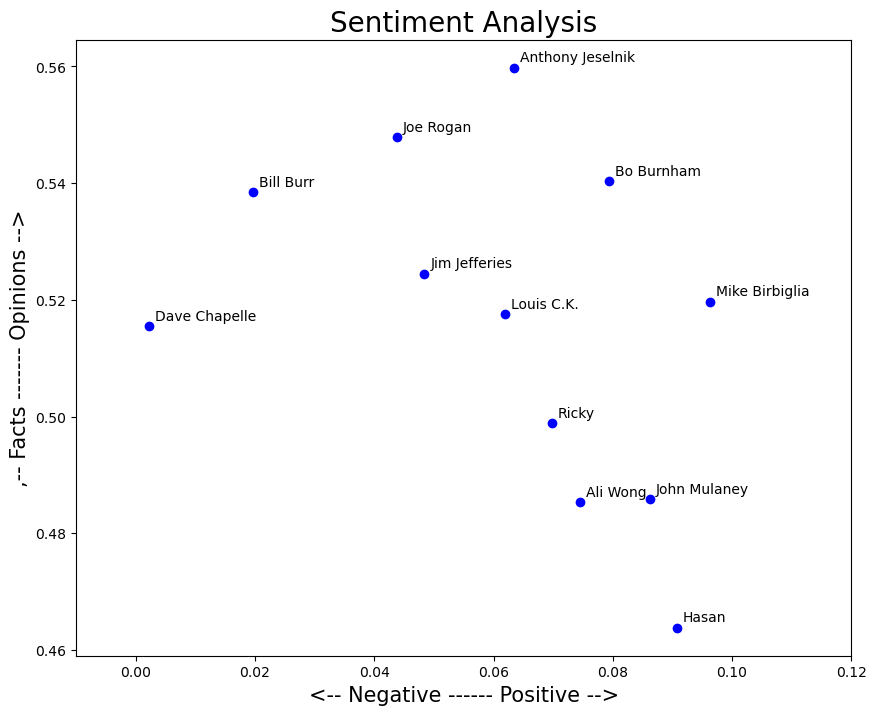

In [25]:
# let's plot the results 
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = [10, 8]
for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative ------ Positive -->', fontsize=15)
plt.ylabel(',-- Facts ------- Opinions -->', fontsize=15)
plt.show()

# findings , 

check sentiment of routine over time 
check if there is any interesting sentiment over time throughout routine


In [35]:
# split each routine into 10 parts 
import numpy as np 
import math 

def split_text(text, n=10):
    '''take in a string, split into n equal parts, with default of 10'''
    # calculate length of text, chunk size, starting point of c 
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # pull out equally sized pieces of text and put it into a list 
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [36]:
# let's look at the data 
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.074543,0.485406
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.063377,0.559790
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.019663,0.538412
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.079319,0.540374
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chapelle,0.002237,0.515530
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan,0.090763,0.463817
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.048405,0.524486
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.043783,0.547919
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.086227,0.485797
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.061908,0.517529


In [37]:
# let's create a list to hold all of the pieces of text 
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [38]:
# the list has 10 elemeents, one for each transcript
len(list_pieces)

12

In [39]:
# each transcipt has been split into 10 pieces of text 
len(list_pieces[0])

10

In [40]:
# calculate the polarit for each piece of text 
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

# show sentiment score of each pieces
polarity_transcript

[[0.10982341269841271,
  0.07011794532627867,
  0.0676048790179225,
  0.1006832611832612,
  -0.042106537530266344,
  0.15212721992995432,
  0.03777319719753929,
  0.1122005091344714,
  0.01344817729351628,
  0.1130333951762523],
 [0.14813544856227787,
  -0.09501356852103121,
  -0.018946837994457046,
  0.03688446969696969,
  0.12692862692862691,
  0.1366996336996337,
  0.08488636363636365,
  0.004733198243836537,
  0.024391379230088904,
  0.16100133104443445],
 [-0.032260689190037016,
  0.003301963736746346,
  0.034964705969860614,
  0.01910127610885185,
  -0.04993463632077493,
  0.10210267356100688,
  0.01893112674362673,
  -0.03218448837868481,
  -0.013136173767752717,
  0.12456281947807374],
 [0.1738758288125377,
  -0.05915352957589287,
  -0.01911550065231571,
  0.040240860990860994,
  0.05460471222766305,
  -0.03846844293272864,
  0.03523965141612201,
  0.20398347760564992,
  0.2006024821952241,
  0.18819047619047616],
 [-0.05093449586407334,
  -0.05840336152622112,
  0.047563317908

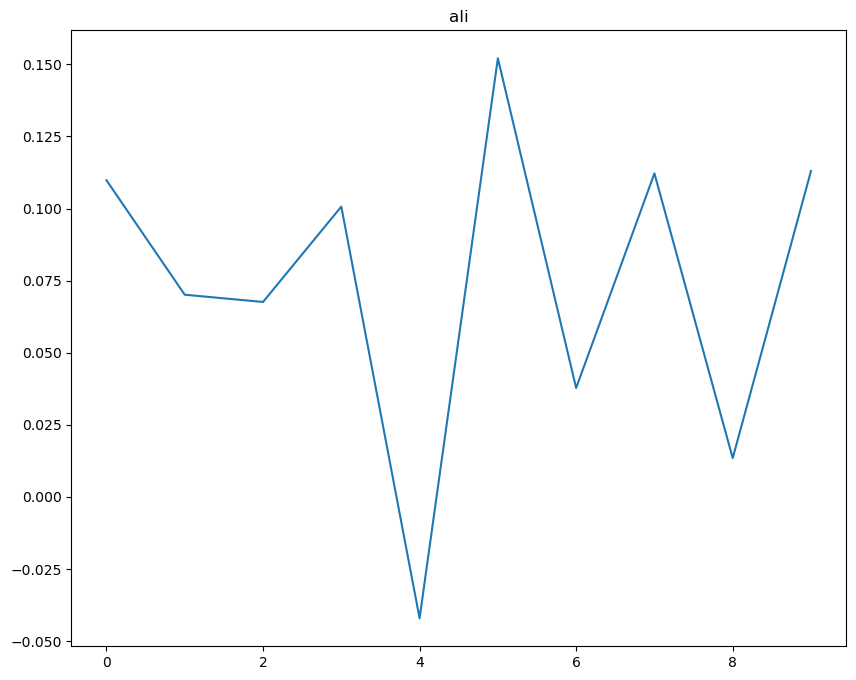

In [41]:
# show plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

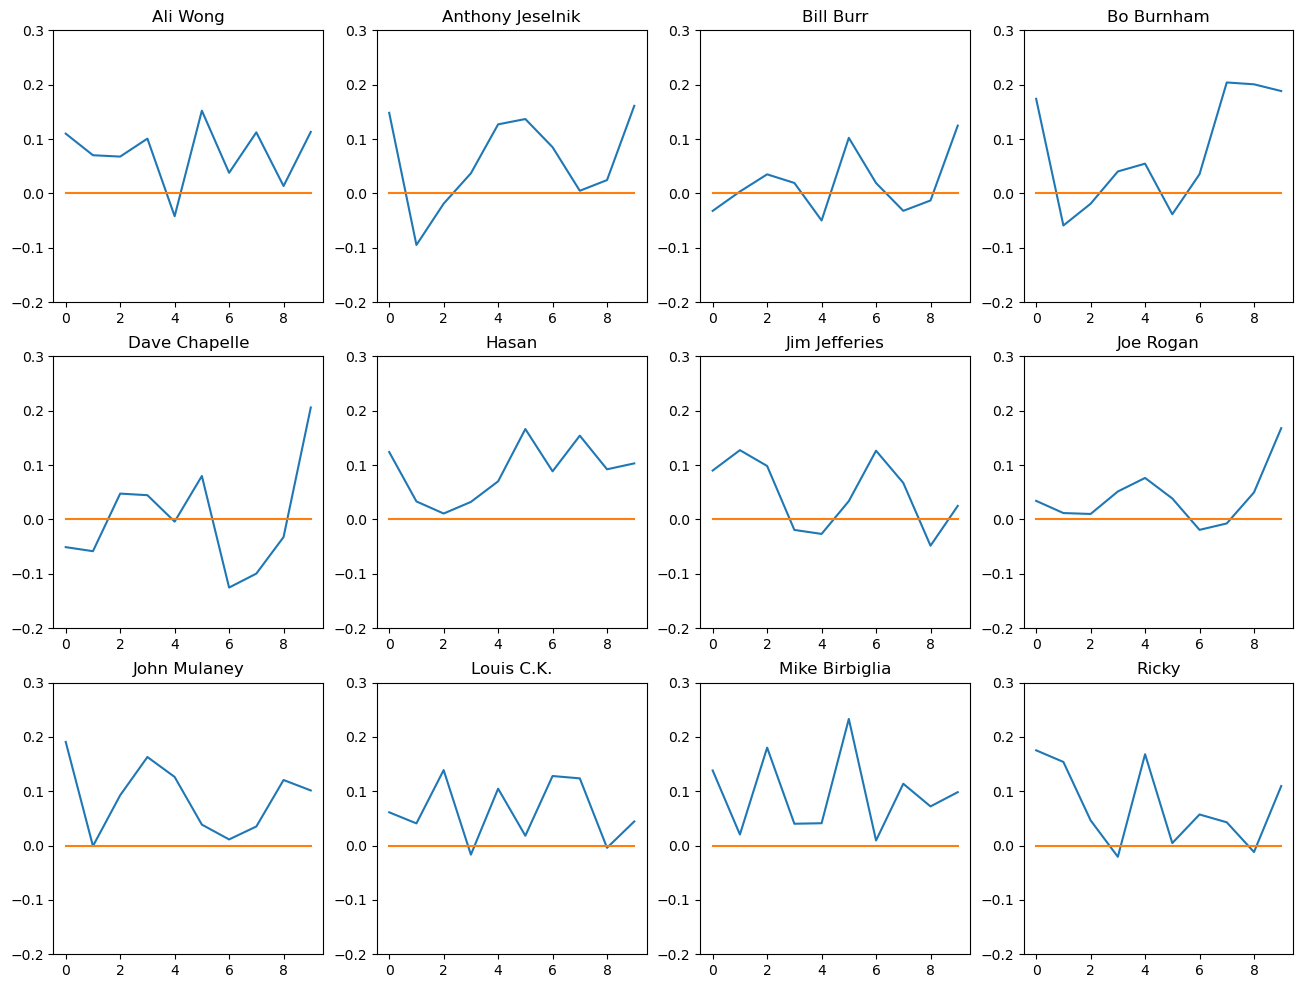

In [42]:
# show plot for all comeddians 
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(bottom=-.2, top=.3)

plt.show()

# we can see ali wong stays generally positive